# Análisis de Datos de Compras en Instacart: Comprendiendo el Comportamiento del Consumidor y Oportunidades de Mejora Estratégica

## **Introducción**

Instacart es una plataforma de entregas de comestibles que permite a los usuarios hacer pedidos en línea y recibirlos a domicilio, similar a Uber Eats y Door Dash. Este proyecto tiene como objetivo analizar estos datos y obtener insights que ayuden a entender el comportamiento de los clientes.

## **Objetivos del Proyecto**

El propósito de este proyecto es realizar un análisis exhaustivo de los datos de pedidos de Instacart para obtener información clave sobre los hábitos de compra de los usuarios y las características de los productos más solicitados. Los objetivos específicos son los siguientes:

1. **Explorar y entender la estructura de los datos**: Realizar un análisis inicial para identificar los elementos presentes en los datos, sus características y posibles problemas, como valores ausentes o duplicados.


2. **Limpieza y preprocesamiento de los datos**: Detectar y corregir problemas en los datos, asegurando que estén listos para el análisis posterior, mediante la imputación de valores ausentes y la eliminación de duplicados.


3. **Análisis exploratorio de los datos**:
   - Identificar los patrones de compra según la hora del día y el día de la semana.
   - Analizar la frecuencia de los pedidos y el tiempo que los usuarios esperan entre un pedido y otro.
   - Determinar cuáles son los productos más comprados y los productos que los usuarios tienden a volver a comprar.
   - Explorar cómo se distribuyen los pedidos en términos de cantidad de artículos y preferencias de los usuarios al agregar productos al carrito.


4. **Ofrecer recomendaciones basadas en los datos**: Utilizar los resultados del análisis para proponer acciones que podrían mejorar la experiencia del cliente y optimizar las operaciones de Instacart, tales como ajustes en la gestión de inventarios y la personalización de ofertas y promociones.

## **Cargar Datos**

In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Función para cargar y mostrar un DataFrame
def cargar_y_mostrar_info(nombre_archivo, sep=';', num_filas=5):
    df = pd.read_csv(nombre_archivo, sep=sep)
    df.info()
    display(df.head(num_filas))
    return df

# Cargar los conjuntos de datos
instacart_orders_df = cargar_y_mostrar_info('/datasets/instacart_orders.csv')
products_df = cargar_y_mostrar_info('/datasets/products.csv')
aisles_df = cargar_y_mostrar_info('/datasets/aisles.csv')
departments_df = cargar_y_mostrar_info('/datasets/departments.csv')
order_products_df = cargar_y_mostrar_info('/datasets/order_products.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [2]:
# Mostrar estadísticas descriptivas
print("Descripción del DataFrame 'instacart_orders_df':")
print(instacart_orders_df.describe())

print("Descripción del DataFrame 'order_products_df':")
print(order_products_df.describe())

Descripción del DataFrame 'instacart_orders_df':
           order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564685e+05   51414.000000       5.000000       1.000000   
50%    1.709522e+06  102633.000000      11.000000       3.000000   
75%    2.562990e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478967.000000           450148.000000  
mean           13.446676               11.101751  
std             4.224986                9.189975  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000        

# Paso 2. Preprocesamiento de los datos

## **Preparar Datos**

### **Detección de Duplicados**

#### instacart_orders_df

In [3]:
# Revisar si hay pedidos duplicados 
print(instacart_orders_df['order_id'].value_counts())

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64


In [4]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
miercoles_orders_2am = instacart_orders_df[(instacart_orders_df['order_dow'] == 3) & 
                                    (instacart_orders_df['order_hour_of_day'] == 2)]
print(miercoles_orders_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [5]:
# Eliminar los pedidos duplicados
instacart_orders_df = instacart_orders_df.drop_duplicates(subset='order_id')

# Vuelve a verificar si hay filas duplicadas
duplicates = instacart_orders_df[instacart_orders_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [6]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders_df['order_id'].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


#### products_df

In [7]:
# Verificar si hay filas totalmente duplicadas
print(products_df[products_df.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [8]:
# Revisar si hay ID de departamentos duplicados
print(products_df['department_id'].value_counts())

11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64


In [9]:
# Revisar si hay nombres duplicados de productos (convertidos a mayúsculas)
products_df['product_name_upper'] = products_df['product_name'].str.upper()
duplicated_products = products_df[products_df['product_name_upper'].duplicated()]
print(products_df['product_name_upper'].value_counts())

GREEN TEA WITH GINSENG AND HONEY         3
FAMILY SIZE LASAGNA WITH MEAT & SAUCE    2
IBUPROFEN TABLETS 200 MG                 2
RIGATONI WITH CHICKEN & PESTO            2
CANDY BAR                                2
                                        ..
BLACK TEA ENGLISH BREAKFAST K-CUPS       1
ZERO SODA                                1
SMALL WHOLE BEETS                        1
RIP-L FAMILY PACK POTATO CHIPS           1
ORIGINAL CAT FOOD                        1
Name: product_name_upper, Length: 48332, dtype: int64


In [10]:
# Revisar si hay nombres duplicados de productos no faltantes
duplicated_products = products_df[products_df['product_name_upper'].duplicated()]
print(duplicated_products['product_name_upper'].value_counts())

GREEN TEA WITH GINSENG AND HONEY      2
SALSA MEDIUM                          1
COOKIES 'N CREAM ICE CREAM            1
MATZO BALL MIX                        1
VITAMIN D3 1000 IU                    1
                                     ..
SOLID WHITE ALBACORE TUNA IN WATER    1
CAULIFLOWER HEAD                      1
HEARTS OF PALM                        1
LEAVE-IN CONDITIONER                  1
ORGANIC BALSAMIC VINEGAR OF MODENA    1
Name: product_name_upper, Length: 103, dtype: int64


#### departments_df

In [11]:
# Verificar si hay filas totalmente duplicadas
print(departments_df[departments_df.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [12]:
# Revisar si hay IDs duplicados de productos
print(departments_df['department_id'].value_counts())

1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: department_id, dtype: int64


#### aisles_df

In [13]:
# Verificar si hay filas totalmente duplicadas
print(aisles_df[aisles_df.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [14]:
# Revisar si hay IDs duplicados de pasillos
print(aisles_df['aisle_id'].value_counts())

1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: aisle_id, Length: 134, dtype: int64


#### order_products_df

In [15]:
# Verificar si hay filas totalmente duplicadas
print(order_products_df[order_products_df.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [16]:
# Volver a verificar si hay cualquier otro duplicado engañoso
duplicated_rows = order_products_df[order_products_df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


#### **Hallazgos**

1. **`instacart_orders_df`**:
   - **Hallazgos**: Se encontraron varias líneas duplicadas basadas en la columna `order_id`. Al eliminar estos duplicados, los pedidos del miércoles a las 2:00 a.m. mostraron un patrón interesante, con 121 pedidos realizados a esa hora.
   - **Acciones**: Se eliminaron los duplicados en `order_id` y se verificó que todos los IDs de pedido fueran únicos.


2. **`products_df`**:
   - **Hallazgos**: No se encontraron filas completamente duplicadas. Sin embargo, se detectaron duplicados en los nombres de productos cuando se convirtieron a mayúsculas. Algunos productos, como "GREEN TEA WITH GINSENG AND HONEY", aparecieron varias veces.
   - **Acciones**: Se identificaron los productos duplicados para un análisis posterior.


3. **`departments_df`**:
   - **Hallazgos**: No se encontraron filas duplicadas ni IDs de departamento duplicados. Todos los departamentos tienen un ID único.
   - **Acciones**: Ninguna acción adicional fue requerida en este DataFrame.


4. **`aisles_df`**:
   - **Hallazgos**: No se encontraron filas duplicadas ni IDs de pasillo duplicados. Todos los pasillos tienen un ID único.
   - **Acciones**: Ninguna acción adicional fue requerida en este DataFrame.


5. **`order_products_df`**:
   - **Hallazgos**: No se encontraron filas completamente duplicadas ni duplicados engañosos en este DataFrame.
   - **Acciones**: Ninguna acción adicional fue necesaria.

#### **Conclusiones**

Se eliminaron duplicados significativos en el DataFrame de pedidos, lo que mejoró la calidad de los datos.
En los DataFrames de productos, departamentos, pasillos y productos de pedido no se encontraron duplicados relevantes que requirieran intervención adicional.

### **Detección y Manejo de Valores Ausentes**


#### products_df

In [17]:
# Encontrar los valores ausentes en la columna 'product_name'
print(products_df['product_name'].value_counts(dropna=False))

NaN                                                    1258
100% Pure Grapefruit                                      1
Opadipity Greek Yogurt Creamy Ranch Dip                   1
Wheat Thins Cheese Crunch 8oz                             1
Instant Hand Sanitizer With Aloe                          1
                                                       ... 
E Plus High C Natural Roll On Deodorant                   1
Cacao Nibs                                                1
Heavy Duty Large Drawstring Bags                          1
Grated Cheese Parmesan                                    1
Organic Baby Food- Sweet Potatoes Starting Solids 1       1
Name: product_name, Length: 48437, dtype: int64


In [18]:
# Filtrar los productos con valores ausentes en 'product_name' y el pasillo con ID 100
missing_product_names = products_df[(products_df['product_name'].isna()) & (products_df['aisle_id'] == 100)]
print(missing_product_names)

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [19]:
# Filtrar los productos con valores ausentes en 'product_name' y el departamento con ID 21
missing_product_names_dept_21 = products_df[(products_df['product_name'].isna()) & (products_df['department_id'] == 21)]
print(missing_product_names_dept_21)

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [20]:
# Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21
aisle_100 = aisles_df[aisles_df['aisle_id'] == 100]
department_21 = departments_df[departments_df['department_id'] == 21]
print("Pasillo con ID 100:")
print(aisle_100)
print("\nDepartamento con ID 21:")
print(department_21)

Pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Departamento con ID 21:
    department_id department
20             21    missing


In [21]:
# Completar los nombres de productos ausentes con 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)

#### instacart_orders_df

In [22]:
# Encontrar los valores ausentes
missing_values_orders = instacart_orders_df.isnull().sum()
print(missing_values_orders)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [23]:
# Verificar si los valores ausentes en 'days_since_prior_order' no son del primer pedido
print(missing_values_orders['days_since_prior_order'] > 0)

True


#### order_products_df

In [24]:
# Encontrar los valores ausentes
missing_values_order_products = order_products_df.isnull().sum()
print(missing_values_order_products)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [25]:
# Revisar el rango de 'add_to_cart_order' para identificar valores extremos
print(order_products_df['add_to_cart_order'].min(), order_products_df['add_to_cart_order'].max())

1.0 64.0


In [26]:
# Rellenar los valores ausentes en 'add_to_cart_order' con 999
order_products_df['add_to_cart_order'].fillna(999, inplace=True)

In [27]:
# Asegurar que los valores de 'add_to_cart_order' sean numéricos
order_products_df['add_to_cart_order'] = pd.to_numeric(order_products_df['add_to_cart_order'], errors='coerce').fillna(999).astype(int)

#### **Hallazgos**

1. **`products_df`**:
   - **Hallazgos**: Se encontraron 1258 valores ausentes en la columna `product_name`. Estos valores ausentes estaban relacionados con el pasillo con ID 100 y el departamento con ID 21, ambos etiquetados como 'missing'.
   - **Acciones**: Los valores ausentes en la columna `product_name` fueron completados con 'Unknown' para asegurar que todos los productos tengan un nombre asignado y evitar problemas en el análisis de los datos.


2. **`instacart_orders_df`**:
   - **Hallazgos**: La columna `days_since_prior_order` presentó 28,817 valores ausentes, lo que sugiere que estos pedidos podrían ser los primeros realizados por los clientes, ya que no había un pedido anterior del cual calcular los días transcurridos.
   - **Acciones**: No se realizaron modificaciones en estos valores, ya que es un comportamiento esperado (primer pedido del cliente).


3. **`order_products_df`**:
   - **Hallazgos**: La columna `add_to_cart_order` presentó 836 valores ausentes. Estos no estaban necesariamente relacionados con pedidos grandes (más de 64 productos), ya que el número mínimo de productos en los pedidos afectados fue menor a ese valor.
   - **Acciones**: Los valores ausentes en `add_to_cart_order` se rellenaron con 999 para asegurar la coherencia en el análisis. Se aseguró que la columna contuviera valores numéricos en todas las filas.

#### **Conclusiones**
- Se completaron los valores ausentes en `product_name` con 'Unknown' para evitar problemas en el análisis.
- Los valores ausentes en `days_since_prior_order` fueron dejados sin modificar, ya que son comportamientos esperados para el primer pedido de los clientes.
- En `order_products_df`, se rellenaron los valores ausentes en `add_to_cart_order` con 999, y se aseguró la consistencia de los datos al convertirlos en valores numéricos.

## **Análisis de los datos**

### **Verificación de Valores en Horas y Días de la Semana**

In [28]:
# Verificar los valores mínimos y máximos en las columnas 'order_hour_of_day' y 'order_dow'del DataFrame 'instacart_orders_df'. 
min_hour = instacart_orders_df['order_hour_of_day'].min()
max_hour = instacart_orders_df['order_hour_of_day'].max()
min_dow = instacart_orders_df['order_dow'].min()
max_dow = instacart_orders_df['order_dow'].max()

print("Valores en 'order_hour_of_day': Min =", min_hour, ", Max =", max_hour)
print("Valores en 'order_dow': Min =", min_dow, ", Max =", max_dow)

Valores en 'order_hour_of_day': Min = 0 , Max = 23
Valores en 'order_dow': Min = 0 , Max = 6


#### Hallazgos

Se verificó que los valores en las columnas order_hour_of_day y order_dow son razonables.

- `order_hour_of_day`: Valores entre 0 y 23.
- `order_dow`: Valores entre 0 y 6.

Los datos son consistentes y no presentan valores atípicos.

### **Distribución de Pedidos por Hora del Día**

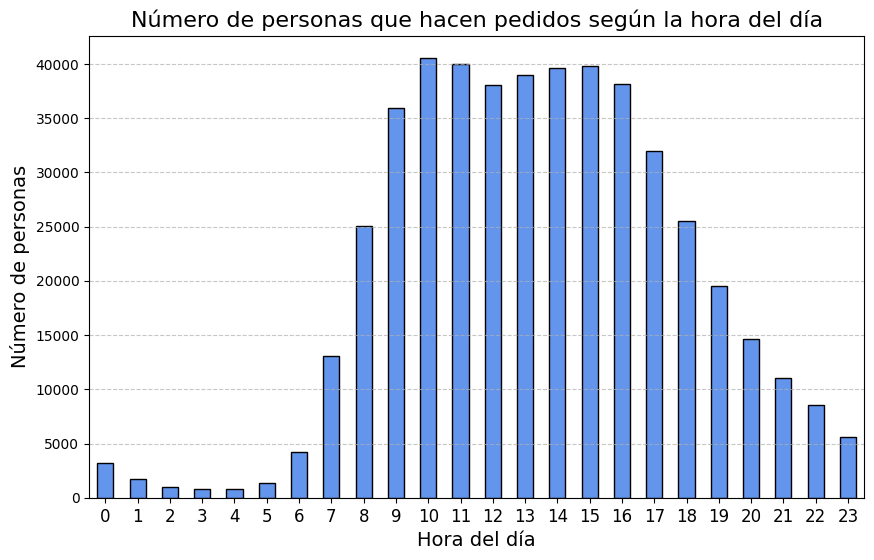

In [29]:
# Distribución de Pedidos por Hora del Día
plt.figure(figsize=(10, 6))
bars = instacart_orders_df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Número de personas que hacen pedidos según la hora del día', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Número de personas', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Hallazgos

El gráfico muestra el número de personas que hacen pedidos según la hora del día. Se puede observar lo siguiente:

- `Pico de actividad entre las 10 a.m. y las 3 p.m.`: La mayor parte de los pedidos se realizan en este rango horario, con un pico máximo alrededor de las 10 a.m. Esto sugiere que muchos usuarios prefieren hacer sus pedidos durante la mañana y al mediodía, posiblemente antes de comenzar otras actividades diarias o al inicio de su jornada laboral.


- `Disminución progresiva a partir de las 4 p.m.`: Después de las 3 p.m., el número de pedidos disminuye gradualmente hasta la noche. Esto podría reflejar que las personas tienden a evitar hacer pedidos al final del día, posiblemente porque prefieren recibir los productos en horas más tempranas.


- `Baja actividad en la madrugada`: Entre la medianoche y las 5 a.m., los pedidos son mucho menores, lo que es predecible ya que la mayoría de las personas no realiza compras en línea durante estas horas.


En resumen, los datos sugieren que la actividad de pedidos sigue un patrón diurno, con un fuerte aumento en la mañana y una disminución constante hacia la tarde y noche. Este hallazgo puede ayudar a Instacart a optimizar la planificación de recursos y la disponibilidad de entregas durante las horas pico.

### **Distribución de Pedidos por Día de la Semana**

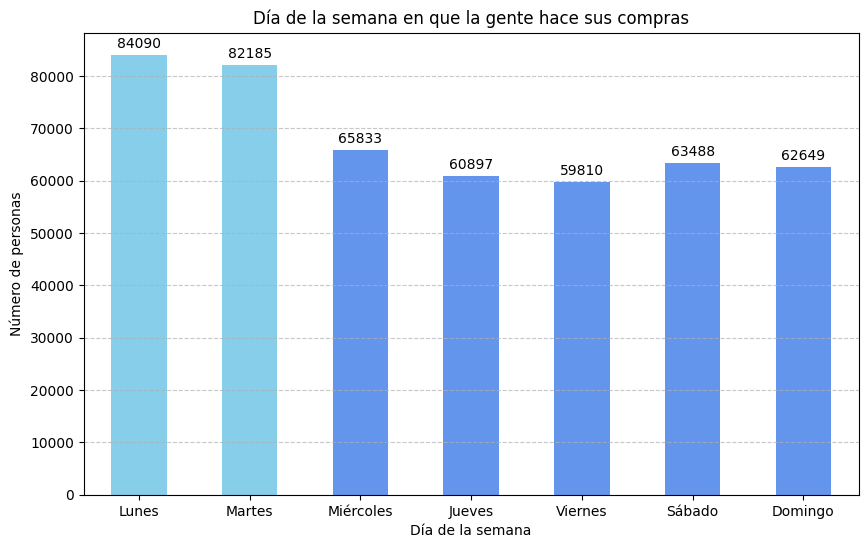

In [30]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Colores personalizados para destacar los días con más pedidos
colors = ['cornflowerblue' if day not in [0, 1] else 'skyblue' for day in instacart_orders_df['order_dow'].value_counts().sort_index().index]

# Graficar las barras con colores personalizados
bars = instacart_orders_df['order_dow'].value_counts().sort_index().plot(kind='bar', color=colors)

# Título y etiquetas
plt.title('Día de la semana en que la gente hace sus compras')
plt.xlabel('Día de la semana')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Agregar las etiquetas sobre las barras con los valores exactos
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

#### Hallazgos


- `Lunes y Martes son los días más activos`: Los usuarios prefieren hacer sus compras al inicio de la semana, siendo el lunes el día con mayor cantidad de pedidos, seguido de cerca por el martes.
  

- `Fin de semana con alta actividad`: Aunque no tan altos como los días lunes y martes, los días sábado y domingo también muestran un volumen significativo de compras, lo que indica que las personas prefieren abastecerse para el fin de semana.


- `Miércoles y viernes son los días menos activos`: Estos días reflejan un menor número de compras, lo que puede estar relacionado con la rutina de los consumidores a mitad y final de la semana.


### **Tiempo de Espera entre Pedidos**

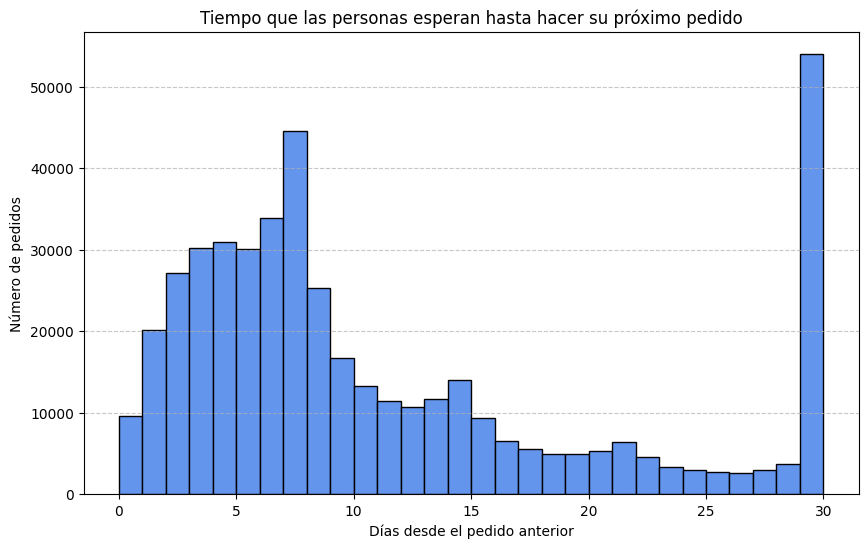

In [31]:
# Crear el gráfico de histograma
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(instacart_orders_df['days_since_prior_order'], bins=30, color='cornflowerblue', edgecolor='black')

plt.title('Tiempo que las personas esperan hasta hacer su próximo pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Hallazgos 

- El gráfico muestra el tiempo que las personas esperan antes de hacer su próximo pedido. Se observan dos picos importantes:

`El primer pico ocurre alrededor del día 7`: Esto sugiere que una gran parte de los usuarios tiende a hacer pedidos semanalmente, probablemente como parte de sus rutinas de compra.

`El segundo pico importante es en el día 30`: Indica que muchos usuarios realizan pedidos de manera mensual, lo que podría estar relacionado con su ciclo de pagos o compras mayores para el mes.

`Además, los usuarios que realizan pedidos con más frecuencia parecen hacerlo entre los días 1 y 15`. La disminución entre el día 16 y el día 29 indica que una menor cantidad de usuarios tiende a esperar más de dos semanas para hacer otro pedido.

### **Diferencia entre Miércoles y Sábado para 'order_hour_of_day'**

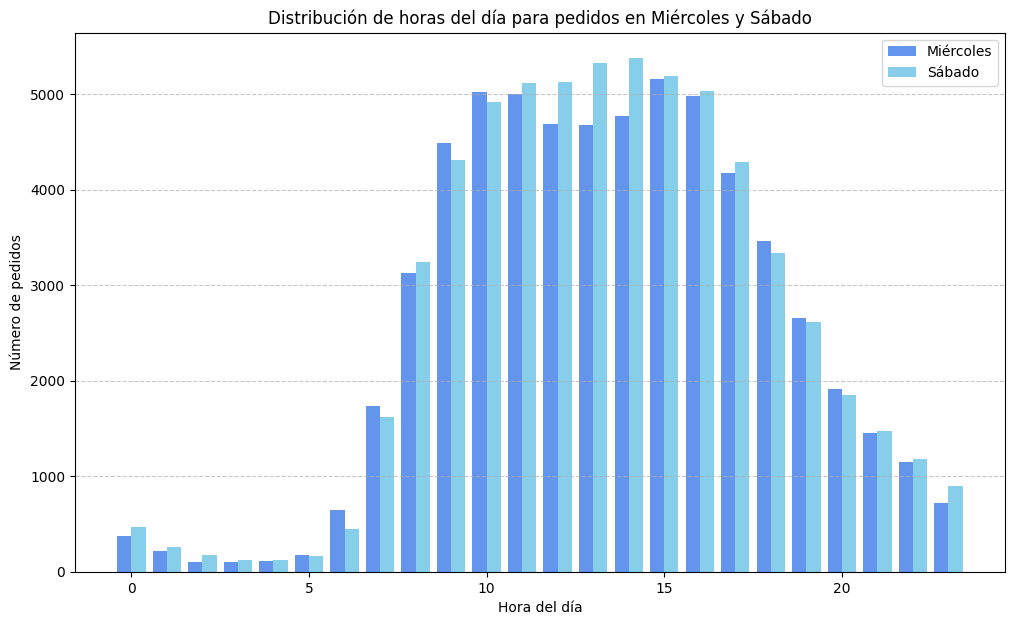

In [32]:
# Filtrar datos de miércoles y sábado
wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 6]

wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 7))

# Graficar barras apiladas
bar_width = 0.4
bars_wed = plt.bar(wednesday_hour_counts.index - bar_width/2, wednesday_hour_counts, 
                   width=bar_width, color='cornflowerblue', label='Miércoles')
bars_sat = plt.bar(saturday_hour_counts.index + bar_width/2, saturday_hour_counts, 
                   width=bar_width, color='skyblue', label='Sábado')

# Título y etiquetas
plt.title('Distribución de horas del día para pedidos en Miércoles y Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.legend()

# Cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Hallazgos

Diferencias en los Pedidos entre Miércoles y Sábado

- `Mayor cantidad de pedidos en sábado`: Aunque ambos días tienen patrones similares, los sábados generalmente tienen un volumen mayor de pedidos en casi todas las horas del día en comparación con los miércoles.


- `Picos de actividad`: Se observa un comportamiento similar en los picos de actividad, entre las 10:00 a.m. y las 14:00 p.m., lo que sugiere que estas horas son las preferidas por los clientes para realizar sus compras en ambos días.


- `Distribución más uniforme en miércoles`: Mientras que los sábados tienen picos más concentrados a media mañana, los miércoles muestran una distribución de pedidos más uniforme a lo largo del día.


### **Distribución del Número de Pedidos por Cliente**

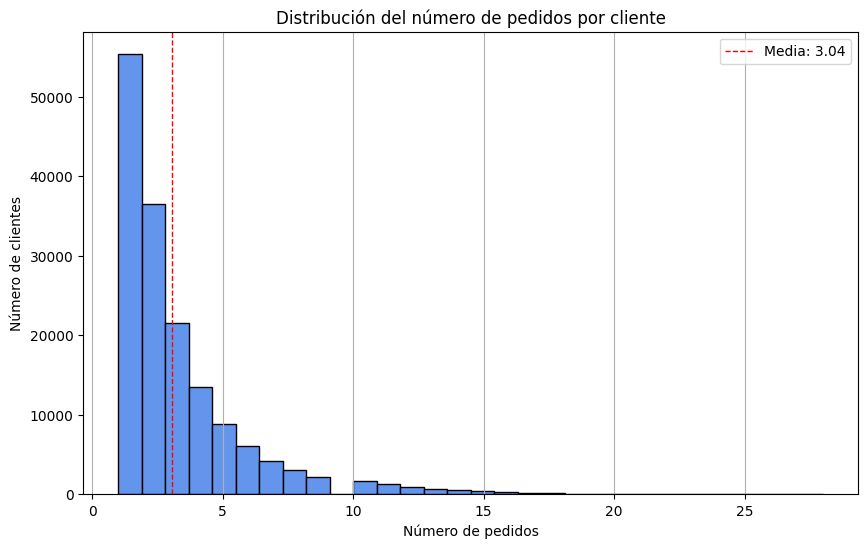

In [33]:
# Distribución del Número de Pedidos por Cliente
orders_per_user = instacart_orders_df.groupby('user_id')['order_id'].count()

plt.figure(figsize=(10, 6))

# Cambiar el número de bins para una visualización más clara
orders_per_user.hist(bins=30, color='cornflowerblue', edgecolor='black')

# Título y etiquetas
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')

# Línea de media
mean_orders = orders_per_user.mean()
plt.axvline(mean_orders, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_orders:.2f}')

# Cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Leyenda
plt.legend()

plt.show()

#### Hallazgos

- `Distribución asimétrica`: La mayoría de los clientes realizan entre 1 y 5 pedidos. Hay una caída pronunciada a medida que aumenta el número de pedidos por cliente, lo que sugiere que solo una minoría realiza más de 10 pedidos.
  

- `Pocos usuarios con muchos pedidos`: Aunque la mayoría de los clientes tienen un número bajo de pedidos, existe una pequeña cantidad de usuarios que realizan un número significativamente mayor, llegando hasta 20-25 pedidos.


- `Promedio de pedidos`: Se añadió una línea que indica el promedio de pedidos por cliente, lo que proporciona una referencia adicional para entender el comportamiento general de la base de usuarios.


### **Productos Más Populares**

In [34]:
# Contar los productos más vendidos y se seleccionan los 20 principales.
top_products = order_products_df['product_id'].value_counts().head(20)

# Iniciar una lista para almacenar los nombres de los productos.
top_products_names = []

# Iterar sobre los IDs de productos más vendidos para obtener sus nombres.
for product_id in top_products.index:
    # Buscamos el nombre del producto en el DataFrame de productos utilizando el product_id.
    product_name = products_df[products_df['product_id'] == product_id]['product_name'].values[0]
    top_products_names.append(product_name)

# Crear un DataFrame con el ID del producto, el nombre del producto y su frecuencia de venta.
top_products_df = pd.DataFrame({'product_id': top_products.index, 'product_name': top_products_names, 'frequency': top_products.values})

# Imprimir el DataFrame resultante con los productos más populares.
print(top_products_df)


    product_id              product_name  frequency
0        24852                    Banana      66050
1        13176    Bag of Organic Bananas      53297
2        21137      Organic Strawberries      37039
3        21903      Organic Baby Spinach      33971
4        47209      Organic Hass Avocado      29773
5        47766           Organic Avocado      24689
6        47626               Large Lemon      21495
7        16797              Strawberries      20018
8        26209                     Limes      19690
9        27845        Organic Whole Milk      19600
10       27966       Organic Raspberries      19197
11       22935      Organic Yellow Onion      15898
12       24964            Organic Garlic      15292
13       45007          Organic Zucchini      14584
14       39275       Organic Blueberries      13879
15       49683            Cucumber Kirby      13675
16       28204        Organic Fuji Apple      12544
17        5876             Organic Lemon      12232
18        82

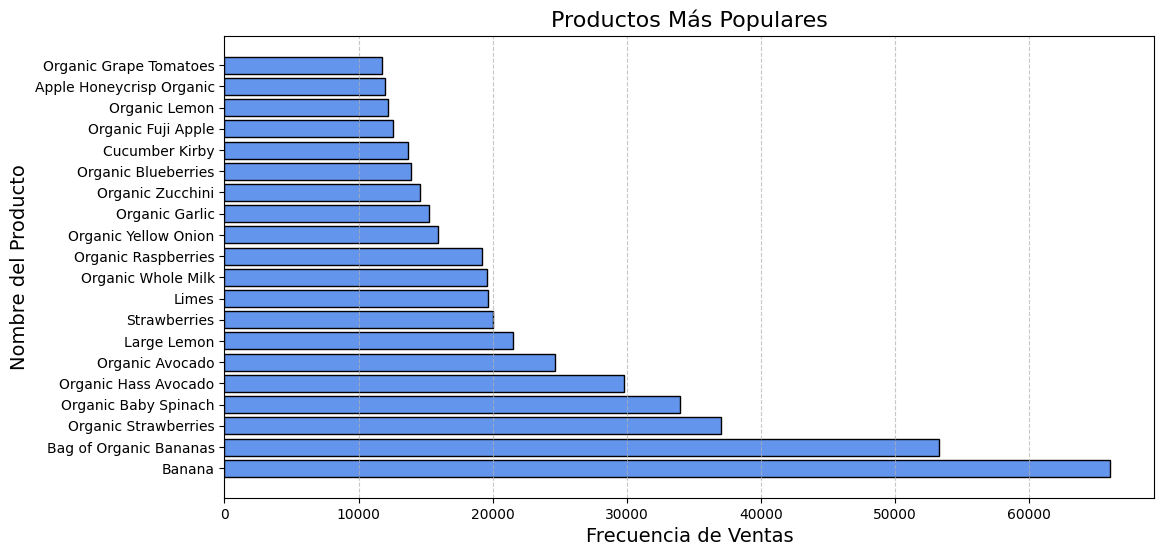

In [35]:
# Crear un gráfico de barras para los productos más populares
plt.figure(figsize=(12, 6))
plt.barh(top_products_df['product_name'], top_products_df['frequency'], color='cornflowerblue', edgecolor='black')
plt.title('Productos Más Populares', fontsize=16)
plt.xlabel('Frecuencia de Ventas', fontsize=14)
plt.ylabel('Nombre del Producto', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

#### Hallazgos

`Productos Más Populares`:

- Los productos más solicitados son principalmente frutas y verduras frescas.

- `Banana, Bag of Organic Bananas`, y `Organic Strawberries` son los más destacados.

`Tendencia hacia Opciones Saludables`:

- La lista incluye productos orgánicos como `Organic Baby Spinach` y` Organic Hass Avocado`, reflejando una preferencia por alimentos saludables.

`Patrones de Consumo`:

- La alta demanda de productos frescos indica un estilo de vida orientado hacia la salud entre los consumidores de Instacart.

`Implicaciones para el Negocio`:

- Esto permite una mejor planificación del inventario para productos de alta rotación.

- Oportunidades para campañas de marketing centradas en productos frescos y orgánicos.

#### Recomendaciones

`Aumentar Stock`: Mantener suficiente inventario de productos frescos y orgánicos.

`Campañas de Marketing`: Desarrollar promociones enfocadas en opciones saludables.

`Encuestas de Satisfacción`: Recopilar retroalimentación de los clientes para ajustar la oferta.

#### Conclusiones

- Los hallazgos resaltan la importancia de las frutas y verduras frescas en el comportamiento de compra, sugiriendo que Instacart debería optimizar su oferta y marketing para alinearse con estas tendencias de salud.

### **Proporción de Productos Reordenados**

       product_id  proportion
0               1    0.564286
2               3    0.738095
3               4    0.510204
4               7    0.500000
5               8    0.315789
...           ...         ...
45568       49690    0.800000
45569       49691    0.430556
45570       49692    0.416667
45571       49693    0.440000
45572       49694    0.333333

[28849 rows x 2 columns]


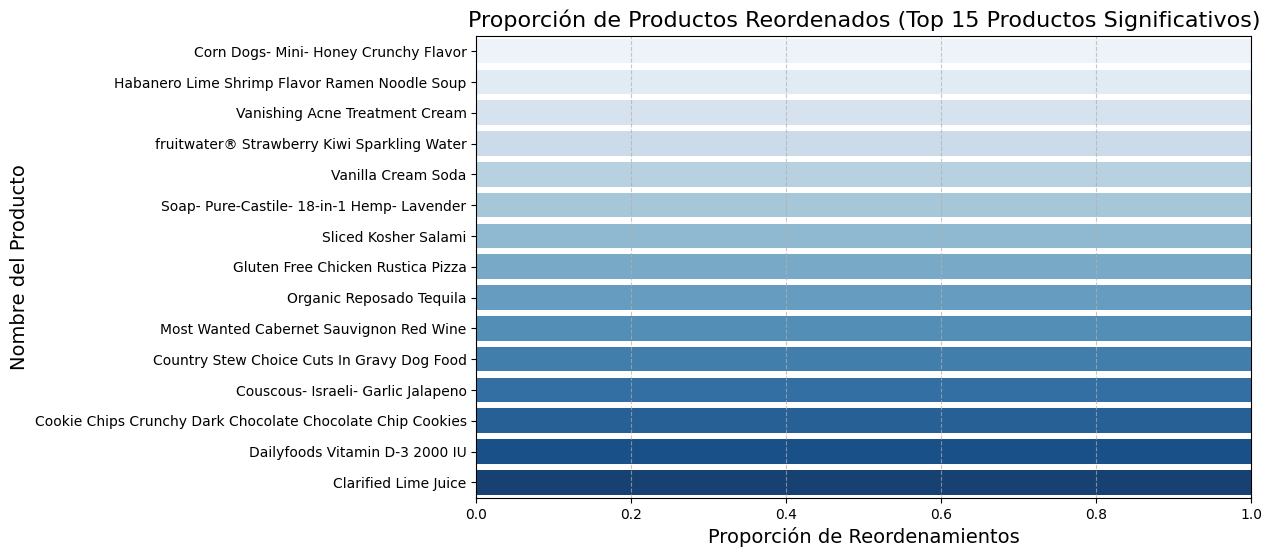

In [51]:
# Filtrar para productos significativos (por ejemplo, con proporciones > 0.3)
significant_products = proportion_reordered_per_product_df[proportion_reordered_per_product_df['proportion'] > 0.3]

# Verificar los datos filtrados
print(significant_products)

# Filtrar para mostrar solo los productos con mayor proporción (Top 15).
top_significant_products = significant_products.nlargest(15, 'proportion')

# Unir con los nombres de productos
top_significant_products = top_significant_products.merge(products_df[['product_id', 'product_name']], on='product_id')

# Graficar con Seaborn.
plt.figure(figsize=(10, 6))
sns.barplot(x='proportion', y='product_name', data=top_significant_products, palette='Blues')
plt.title('Proporción de Productos Reordenados (Top 15 Productos Significativos)', fontsize=16)
plt.xlabel('Proporción de Reordenamientos', fontsize=14)
plt.ylabel('Nombre del Producto', fontsize=14)
plt.xlim(0, 1)  # Asegurarse de que el eje x vaya de 0 a 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



#### Hallazgos

`Proporciones de Reordenamiento`:

- Muchos productos tienen proporciones de reordenamiento inferiores a 0.5, lo que sugiere que no son considerados esenciales por los consumidores.

- Productos con proporción de reordenamiento de 1.0 indican alta lealtad y compra repetida.

`Identificación de Productos Clave`:

- Productos como `"Clarified Lime Juice"` y `"Dailyfoods Vitamin D-3 2000 IU"` son frecuentemente reordenados, lo que sugiere que son esenciales para los consumidores.

`Tendencias de Consumo`:

- Los consumidores tienden a reordenar productos específicos, lo que puede indicar preferencias claras en sus decisiones de compra.

#### Recomendaciones

`Estrategia de Marketing`:

- Desarrollar campañas promocionales centradas en productos con alta tasa de reordenamiento para incentivar las compras.

`Análisis Continuo`:

- Realizar un seguimiento regular de la proporción de reordenamiento para identificar tendencias y ajustar estrategias de inventario.

`Optimización del Inventario`:

- Asegurar la disponibilidad constante de productos con alta tasa de reordenamiento para satisfacer la demanda de los clientes.

#### Conclusiones

- La visualización y el análisis de la proporción de productos reordenados revelan patrones claros en el comportamiento del consumidor.

- Utilizar esta información estratégicamente puede mejorar la satisfacción del cliente y fomentar la lealtad hacia los productos.

- Adoptar las recomendaciones propuestas permitirá a la empresa optimizar sus recursos y maximizar las oportunidades de ventas.

### **Productos que se Agregan Primero al Carrito**

    product_id  frequency                 product_name
0        24852      15562                       Banana
1        13176      11026       Bag of Organic Bananas
2        27845       4363           Organic Whole Milk
3        21137       3946         Organic Strawberries
4        47209       3390         Organic Hass Avocado
5        21903       3336         Organic Baby Spinach
6        47766       3044              Organic Avocado
7        19660       2336                 Spring Water
8        16797       2308                 Strawberries
9        27966       2024          Organic Raspberries
10       44632       1914   Sparkling Water Grapefruit
11       49235       1797          Organic Half & Half
12       47626       1737                  Large Lemon
13         196       1733                         Soda
14       38689       1397     Organic Reduced Fat Milk
15       26209       1370                        Limes
16       12341       1340                Hass Avocados
17        

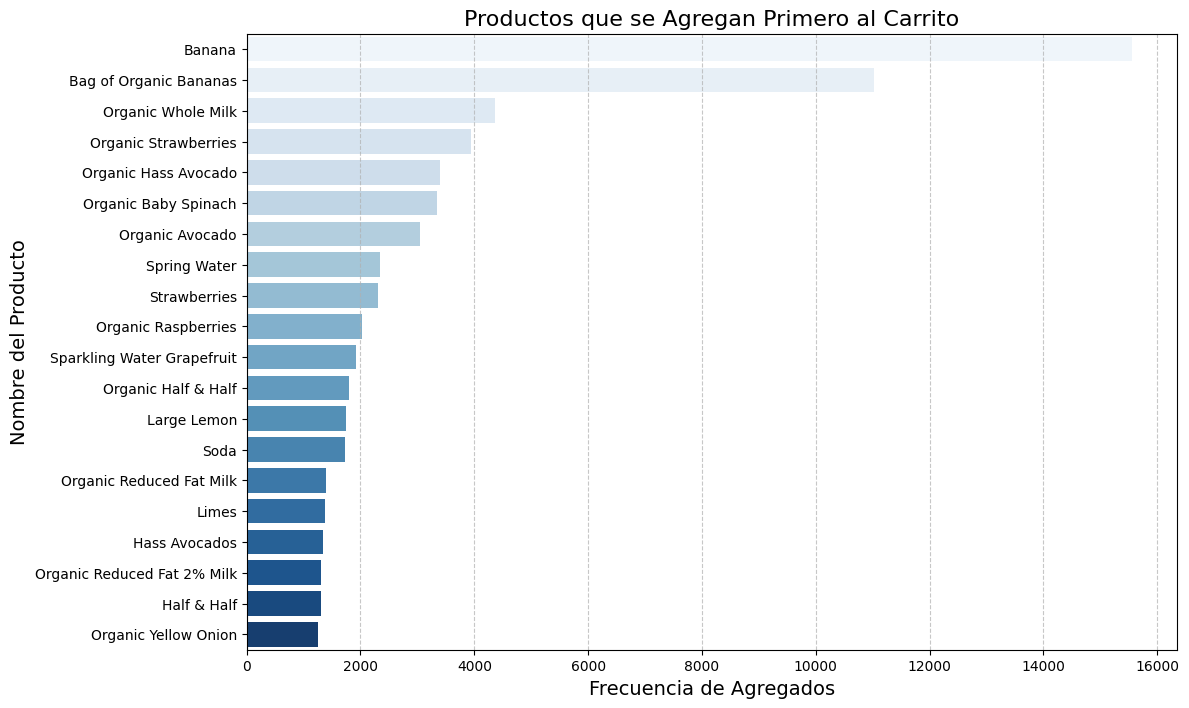

In [55]:
# Filtrar los productos que se agregan primero al carrito (add_to_cart_order == 1)
top_first_cart_items = order_products_df[order_products_df['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

# Crear un DataFrame para almacenar la información de los productos
top_first_cart_items_info = pd.DataFrame({
    'product_id': top_first_cart_items.index,
    'frequency': top_first_cart_items.values
})

# Unir el DataFrame con los nombres de los productos
top_first_cart_items_info = pd.merge(top_first_cart_items_info, products_df[['product_id', 'product_name']], on='product_id', how='left')

# Imprimir el DataFrame resultante que muestra los productos más frecuentemente agregados al carrito
print(top_first_cart_items_info)

# Graficar los productos que se agregan primero al carrito
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='product_name', data=top_first_cart_items_info, palette='Blues')
plt.title('Productos que se Agregan Primero al Carrito', fontsize=16)
plt.xlabel('Frecuencia de Agregados', fontsize=14)
plt.ylabel('Nombre del Producto', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### Hallazgos

`Productos Más Agregados`:

- Los productos que se agregan primero al carrito son principalmente frutas y productos lácteos.
`Banana`, `Bag of Organic Bananas`, y `Organic Whole Milk` se encuentran entre los más agregados.

`Tendencias en Comportamiento de Compra`:

- La predominancia de productos frescos y orgánicos sugiere que los consumidores tienden a priorizar estos artículos al hacer sus compras.

`Diversidad de Productos`:

- El listado incluye una variedad de productos, desde frutas hasta bebidas, reflejando diferentes categorías que atraen a los consumidores.

`Oportunidades de Ventas`:

- Los productos como Organic Baby Spinach y Organic Hass Avocado indican un interés creciente por opciones saludables entre los consumidores.

#### Recomendaciones

`Optimización del Inventario`:

- Asegurarse de mantener suficiente stock de los productos que se agregan primero al carrito para satisfacer la demanda.

`Marketing Dirigido`:

- Implementar campañas de marketing que resalten estos productos para captar la atención de los consumidores desde el inicio de su experiencia de compra.

`Promociones de Productos Frescos`:

- Ofrecer descuentos o promociones para productos que se agregan primero al carrito podría incentivar más compras.

#### Conclusiones

- Los hallazgos indican que los consumidores de Instacart tienen una fuerte preferencia por productos frescos y orgánicos al realizar sus compras. Esto presenta una oportunidad para que Instacart optimice su inventario y desarrolle estrategias de marketing enfocadas en estos productos, mejorando así la experiencia del cliente y potencialmente aumentando las ventas.

## **Conclusión Final**

Este análisis de datos de Instacart ofrece una comprensión detallada de los hábitos de compra de los clientes y los patrones de consumo en línea, destacando varias tendencias clave:

`Preferencias Horarias y Diarias`: La mayoría de los pedidos se concentran entre las 10 a.m. y las 3 p.m., con mayor actividad en los días lunes y martes. Esto indica que los consumidores tienden a realizar sus compras al inicio de la semana y durante las horas matutinas.

`Tiempo entre Pedidos`: Muchos clientes realizan compras semanalmente, con picos de actividad en pedidos mensuales. Esto sugiere la necesidad de estrategias de marketing que consideren la frecuencia de compra de los usuarios.

`Productos Populares y Reordenados`: Los productos más solicitados son principalmente frutas y verduras frescas, reflejando una preferencia por opciones saludables. La alta tasa de reordenamiento de ciertos artículos sugiere lealtad del cliente, lo que brinda oportunidades para personalizar ofertas.

`Comportamiento de Agregación al Carrito`: Los productos que se agregan primero al carrito son mayoritariamente frescos y orgánicos, indicando que estos artículos son esenciales en la planificación de compras.

`Recomendaciones Estratégicas`: Se sugiere que Instacart implemente estrategias de marketing enfocadas en productos populares y de alta rotación. Mejorar la experiencia del cliente durante las horas pico y los días más activos puede aumentar la satisfacción y fomentar la lealtad a largo plazo.

En conclusión, este proyecto no solo resalta los comportamientos actuales de los consumidores de Instacart, sino que también proporciona un marco para decisiones estratégicas que optimizarán la operación de la plataforma y mejorarán la experiencia del cliente.